In [379]:
#BIBLIOTECAS
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf


In [380]:
#Baixando os dados da ação em estudo, e adicionando as médias móveis mais utilizadas no mercado financeiro
df = yf.download('VALE3.SA', '2020-01-01', '2023-01-01')
df['mma20'] = df['Close'].rolling(20).mean()
df['mma100'] = df['Close'].rolling(100).mean()
df['mma200'] = df['Close'].rolling(200).mean()



[*********************100%%**********************]  1 of 1 completed


In [381]:

df['Close'] = df['Close'].shift(-1)
df

,Open,High,Low,Close,Adj Close,Volume,mma20,mma100,mma200
Date,,,,,,,,,
2020-01-02,53.980000,54.439999,53.750000,53.930000,36.413357,17509700,NaN,NaN,NaN
2020-01-03,53.680000,54.500000,53.580002,53.610001,36.145267,17284800,NaN,NaN,NaN
2020-01-06,53.799999,53.799999,53.150002,54.000000,35.930786,32787800,NaN,NaN,NaN
2020-01-07,53.500000,54.189999,53.400002,54.009998,36.192181,16326400,NaN,NaN,NaN
2020-01-08,54.200001,54.369999,53.619999,53.299999,36.198879,15298500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-23,85.279999,86.519997,85.080002,87.110001,77.709404,18656500,85.9995,74.1433,78.53170
2022-12-26,86.419998,87.540001,86.330002,89.190002,78.420609,18407500,86.2900,74.3119,78.48075
2022-12-27,88.000000,89.650002,87.470001,88.989998,80.293121,26720300,86.5275,74.5286,78.44275


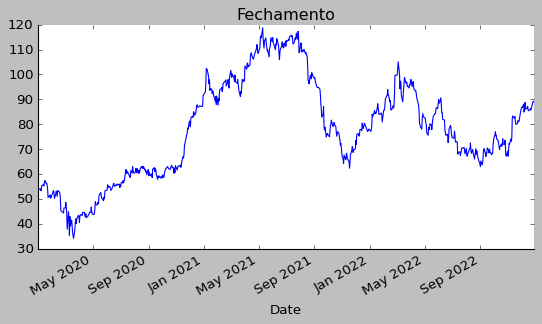

In [382]:
#Plotagem do fechamento do preço da ação durante todo o período
from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Fechamento')
plt.gca().spines[['top', 'right']].set_visible(False)

In [383]:
#Apagando os nulos e definindo a data utilizamos o describe para verificar se os quartis estão distribuidos de maneira equilibrada, conforme mostra os dados coletados, os
df.dropna(inplace=True)
df["data"] = df.index
df.describe()


,Open,High,Low,Close,Adj Close,Volume,mma20,mma100,mma200,data
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02,545.000000,545.000000,545.000000,545
mean,86.682716,87.820440,85.460147,86.688092,68.681058,2.975335e+07,86.181961,84.959977,82.907059,2021-11-25 20:02:12.110091520
min,60.970001,62.070000,59.790001,60.259998,42.076103,9.688500e+06,60.065500,58.972700,53.264150,2020-10-19 00:00:00
25%,74.199997,75.900002,73.480003,74.849998,62.139248,2.177870e+07,72.920000,74.311900,78.819850,2021-05-12 00:00:00
50%,85.279999,86.519997,84.360001,85.400002,68.176575,2.695910e+07,84.249000,83.813700,82.921700,2021-11-26 00:00:00
75%,97.209999,98.410004,95.870003,97.129997,77.133255,3.517460e+07,96.365000,94.823700,93.529850,2022-06-14 00:00:00
max,119.800003,120.449997,115.250000,118.720001,87.283943,9.147790e+07,114.325500,110.312000,101.660100,2022-12-28 00:00:00
std,15.104602,15.168453,14.935050,15.020253,9.973306,1.189881e+07,14.975866,13.674235,13.186868,NaN


In [384]:
#Reseta index
df = df.reset_index(drop=True)
df


,Open,High,Low,Close,Adj Close,Volume,mma20,mma100,mma200,data
0,62.730000,63.180000,61.950001,61.840000,43.256138,29156200,60.0655,58.9727,53.26415,2020-10-19
1,61.779999,62.290001,61.330002,62.849998,43.179329,25276800,60.1575,59.0902,53.30170,2020-10-20
2,61.650002,63.209999,61.599998,63.099998,43.884556,21480900,60.4095,59.1887,53.34630,2020-10-21
3,63.110001,63.490002,62.439999,63.450001,44.059113,32097700,60.6095,59.2855,53.39375,2020-10-22
4,62.619999,63.889999,62.220001,62.500000,44.303493,24263400,60.8490,59.3858,53.44100,2020-10-23
...,...,...,...,...,...,...,...,...,...,...
540,86.279999,86.650002,84.690002,86.320000,77.196266,19429200,85.7285,73.9609,78.57105,2022-12-22
541,85.279999,86.519997,85.080002,87.110001,77.709404,18656500,85.9995,74.1433,78.53170,2022-12-23
542,86.419998,87.540001,86.330002,89.190002,78.420609,18407500,86.2900,74.3119,78.48075,2022-12-26
543,88.000000,89.650002,87.470001,88.989998,80.293121,26720300,86.5275,74.5286,78.44275,2022-12-27


In [385]:
#Definir o número de linhas para serem treinadas
numero_linhas_treino = math.ceil(len(df) * .8)
numero_linhas_teste = math.ceil(len(df) * .2)
print(numero_linhas_treino)
print(numero_linhas_teste)

436
109


In [386]:
#Definindo as features e a label
features = df.drop(['Open' , 'Adj Close' , 'Close', 'data'], axis=1)
resultado = df['Close']
df

,Open,High,Low,Close,Adj Close,Volume,mma20,mma100,mma200,data
0,62.730000,63.180000,61.950001,61.840000,43.256138,29156200,60.0655,58.9727,53.26415,2020-10-19
1,61.779999,62.290001,61.330002,62.849998,43.179329,25276800,60.1575,59.0902,53.30170,2020-10-20
2,61.650002,63.209999,61.599998,63.099998,43.884556,21480900,60.4095,59.1887,53.34630,2020-10-21
3,63.110001,63.490002,62.439999,63.450001,44.059113,32097700,60.6095,59.2855,53.39375,2020-10-22
4,62.619999,63.889999,62.220001,62.500000,44.303493,24263400,60.8490,59.3858,53.44100,2020-10-23
...,...,...,...,...,...,...,...,...,...,...
540,86.279999,86.650002,84.690002,86.320000,77.196266,19429200,85.7285,73.9609,78.57105,2022-12-22
541,85.279999,86.519997,85.080002,87.110001,77.709404,18656500,85.9995,74.1433,78.53170,2022-12-23
542,86.419998,87.540001,86.330002,89.190002,78.420609,18407500,86.2900,74.3119,78.48075,2022-12-26
543,88.000000,89.650002,87.470001,88.989998,80.293121,26720300,86.5275,74.5286,78.44275,2022-12-27


In [387]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Separa os dados de treino teste e validação
x_treinamento = features[:numero_linhas_treino]
x_teste = features[numero_linhas_treino:numero_linhas_treino + numero_linhas_teste -1]

y_treinamento = resultado[:numero_linhas_treino]
y_teste = resultado[numero_linhas_treino:numero_linhas_treino + numero_linhas_teste -1]





In [388]:
#Realizar a normalização dos dados
normalizacao = MinMaxScaler()

x_treinamento_normalizado = normalizacao.fit_transform(x_treinamento)
x_teste_normalizado = normalizacao.transform(x_teste)
print( len(x_treinamento), len(y_treinamento))
print( len(x_teste), len(y_teste))


436 436
108 108


In [389]:
modelo_regressao = LinearRegression().fit(x_treinamento_normalizado, y_treinamento)
predicao= modelo_regressao.predict(x_teste_normalizado)
coeficiente_determinacao =r2_score(y_teste, predicao)
coeficiente_determinacao

0.93417787361489

In [390]:
valor_teste = features.tail(108)
valor_teste
previsao=normalizacao.transform(valor_teste)
predicao=modelo_regressao.predict(previsao)
predicao


array([70.69360406, 70.05585833, 71.29752843, 69.00534683, 68.97559268,
       69.15553379, 69.12129806, 67.40657529, 68.14005008, 68.4966197 ,
       69.32391881, 70.11929055, 72.33528439, 69.13757476, 67.96786973,
       69.89038427, 68.39685314, 68.22805024, 66.89856638, 66.55843735,
       68.98187046, 69.38942215, 69.0070682 , 70.18150699, 67.55762549,
       65.79065662, 65.2260483 , 63.19078042, 64.01699369, 65.77771635,
       64.94722907, 64.3681762 , 68.37351214, 70.18542843, 70.05229713,
       68.1556379 , 68.09422854, 67.827178  , 69.48332844, 69.50059133,
       69.35608228, 70.19857579, 68.54097706, 68.94733339, 67.88905741,
       68.44469604, 68.28968612, 71.2110418 , 73.08708751, 75.43487084,
       77.17217254, 76.31227077, 77.60507467, 75.74258975, 73.4483597 ,
       72.20863019, 72.12557115, 70.64550028, 72.18383606, 71.69958554,
       72.2209776 , 73.5938898 , 73.05743488, 72.54789825, 73.58413378,
       71.09844279, 68.13481427, 68.1343882 , 70.14597857, 67.52

In [391]:
#Plotagem da tabela de comparação dos preços reais e a previsão
data_negociacao=df['data']
data=data_negociacao.tail(108)

# O resultado real do fechamento do preço das ações
dados_real=df['Close']
real=dados_real.tail(108)

df=pd.DataFrame({'data':data, 'real':real, 'previsao':predicao})

df.set_index('data', inplace=True)
df


,real,previsao
data,,
2022-07-26,70.519997,70.693604
2022-07-27,70.690002,70.055858
2022-07-28,69.750000,71.297528
2022-07-29,68.080002,69.005347
2022-08-01,70.250000,68.975593
...,...,...
2022-12-22,86.320000,86.010874
2022-12-23,87.110001,86.047983
2022-12-26,89.190002,87.135475


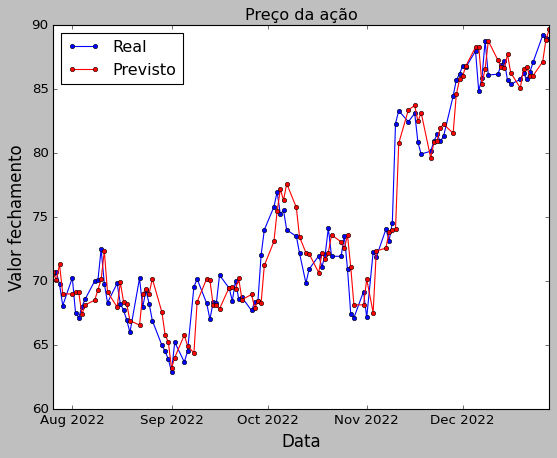

In [392]:
from matplotlib import pyplot as plt
#plotagem
plt.style.use('classic')
plt.plot(df['real'],label = "Real", linestyle='-', marker='o', color = 'blue', markersize = 4)
plt.plot(df['previsao'],label = "Previsto", linestyle='-', marker='o', color = 'red', markersize = 4)
plt.xlabel('Data', fontsize=15)
plt.ylabel('Valor fechamento', fontsize=15)
plt.title('Preço da ação')
plt.legend(loc='best')
